# Example 9: Singularity

Let's construct a dataset which contains singularity $f(x,y)=sin(log(x)+log(y))
 (x>0,y>0)$

In [1]:
from kan import *
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,1,1], grid=5, k=3, seed=2, device=device)
f = lambda x: torch.sin(2*(torch.log(x[:,[0]])+torch.log(x[:,[1]])))
dataset = create_dataset(f, n_var=2, ranges=[0.2,5], device=device)

# train the model
model.fit(dataset, opt="LBFGS", steps=20);

cuda
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.14e-01 | test_loss: 1.29e-01 | reg: 6.34e+00 | : 100%|█| 20/20 [00:03<00:00,  5.03it

saving model version 0.1


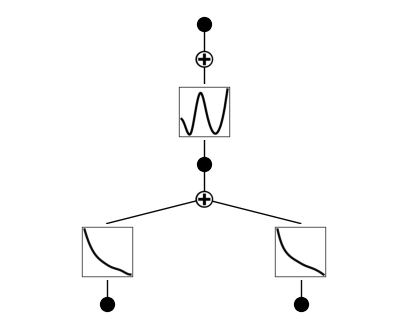

In [2]:
model.plot()

In [3]:
model.fix_symbolic(0,0,0,'log')
model.fix_symbolic(0,1,0,'log')
model.fix_symbolic(1,0,0,'sin')

r2 is 0.9974619150161743
saving model version 0.2
r2 is 0.997527003288269
saving model version 0.3
r2 is 0.9740613698959351
saving model version 0.4


tensor(0.9741, device='cuda:0')

In [4]:
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: 2.66e-07 | test_loss: 2.75e-07 | reg: 0.00e+00 | : 100%|█| 20/20 [00:01<00:00, 15.69it

saving model version 0.5


In [5]:
ex_round(model.symbolic_formula()[0][0], 3)

-1.0*sin(2.0*log(5.017*x_1) + 2.0*log(1.512*x_2) - 7.194)

We were lucky -- singularity does not seem to be a problem in this case. But let's instead consider $f(x,y)=\sqrt{x^2+y^2}$. $x=y=0$ is a singularity point.

In [6]:
from kan import *
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,1,1], grid=5, k=3, seed=0)
f = lambda x: torch.sqrt(x[:,[0]]**2+x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)

# train the model
model.fit(dataset, opt="LBFGS", steps=20);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.65e-03 | test_loss: 3.97e-03 | reg: 4.84e+00 | : 100%|█| 20/20 [00:03<00:00,  5.36it


saving model version 0.1


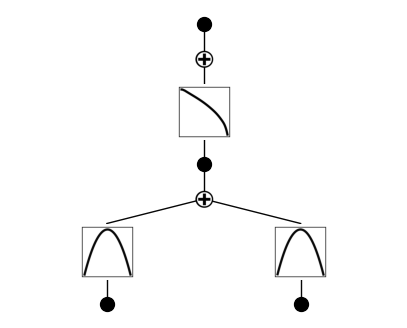

In [7]:
model.plot()

In [8]:
model.fix_symbolic(0,0,0,'x^2')
model.fix_symbolic(0,1,0,'x^2')
model.fix_symbolic(1,0,0,'sqrt')

r2 is 0.9999973773956299
saving model version 0.2
r2 is 0.9999948740005493
saving model version 0.3
r2 is 0.9998846650123596
saving model version 0.4


tensor(0.9999)

In [9]:
model = model.rewind('0.4')
model.get_act(dataset)

rewind to model version 0.4, renamed as 1.4


In [10]:
formula = model.symbolic_formula()[0][0]
formula

1.00775534257195*sqrt(0.999962771771901*(6.10769914067904e-5 - x_1)**2 + (9.20887777110479e-5 - x_2)**2 + 0.00441348508007971) - 0.00955450534820557

In [11]:
ex_round(formula, 2)

1.01*sqrt(1.0*x_1**2 + x_2**2) - 0.e-2

w/ singularity avoiding (LBFGS may still get nan because of line search, but Adam won't get nan).

In [12]:
model.fit(dataset, opt="Adam", steps=1000, lr=1e-3, update_grid=False, singularity_avoiding=True);

| train_loss: 5.11e-04 | test_loss: 5.64e-04 | reg: 0.00e+00 | : 100%|█| 1000/1000 [00:14<00:00, 70.


saving model version 1.5


w/o singularity avoiding, nan may appear

In [13]:
model.fit(dataset, opt="Adam", steps=1000, lr=1e-3, update_grid=False);

| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████| 1000/1000 [00:17<00:00, 57.55it/s]


saving model version 1.6
